# Simplified Bayesian Network for Production Incident Analysis 

A probabilistic model to understand causes and risks of incidents in a microservices infrastructure   

As a DevOps/Platform Engineer apprentice in a SAAS company, I frequently observe teams rigging the fire alarm when production alerts trigger. Engineers from Juniors to Manager rush in a call all together to:   

- Understand the problem's nature, impact and scope
- Investigate root causes
     
This inspired me to explore how a Bayesian network could help highlighting probable causes and predict potential consequences  

This repository contains a **very simplified** POC implementation using ~10 key variables.   

# The Bayesian Network structure

the structure was made by myself.

![./bn.png](./bn.png)

For real case usage, please use a structure learning algorithm to find your bayesian network structure.

## Noisy OR

Because some variables have a lot of parent dependences, we sometime want to put Noisy OR to reduce the network complexity.

In our case, we will add a Noisy OR on the variables : 

- Slowdown
- Alert triggered
- High error rate

Standard CPT for Slowdown with 5 binary parents would be 2^5 = 32 parameters  
With a Noisy-OR it gets reduced to only 5 parameters 

# Define all the questions

Based on the number of nodes and the Noisy OR in the bayesian network aswell as the number of values , we need at least **41** questions to ask to the experts in order to create all our probability distribution.

## Questions

### Charge des services :
1. Quelle est la probabilité qu'un fort trafic utilisateur entraîne une augmentation de la charge des services ?
2. Quelle est la probabilité qu'une panne de scaling entraîne une augmentation de la charge des services ?
3. Quelle est la probabilité qu'une panne de scaling et un fort trafic utilisateur entraînent une augmentation de la charge des services ?
4. Quelle est la probabilité qu'un trafic utilisateur normal sans panne de scaling entraîne une augmentation de la charge des services ?
### Queue dangereuse :
5. Quelle est la probabilité qu'une forte charge des services entraîne une dégradation significative de l'état d'une queue ?
6. Quelle est la probabilité d'observer une dégradation de l'état de la queue alors que la charge des services n'est pas forte ?
### BDD dangereuse :
7. Quelle est la probabilité qu'une forte charge des services entraîne une dégradation significative de l'état d'une base de données ?
8. Quelle est la probabilité d'observer une dégradation de l'état d'une base de données alors que la charge des services n'est pas forte ?
### Noisy OR Taux d'erreur :
9. Quelle est la probabilité qu'un récent déploiement entraîne une augmentation du taux d'erreur global de la plateforme ?
10. Quelle est la probabilité qu'une panne d'un service externe entraîne une augmentation du taux d'erreur global de la plateforme ?
11. Quelle est la probabilité qu'une base de données dans un état dangereux entraîne une augmentation du taux d'erreur global de la plateforme ?
### Noisy OR sur Ralentissement :
12. Quelle est la probabilité qu'une queue dans un état dangereux entraîne des ralentissements ?
13. Quelle est la probabilité qu'une base de données dans un état dangereux entraîne des ralentissements ?
14. Quelle est la probabilité qu'une panne de scaling entraîne des ralentissements ?
15. Quelle est la probabilité qu'un récent déploiement entraîne des ralentissements ?
16. Quelle est la probabilité qu'une panne d'un service externe entraîne des ralentissements ?
### Noisy OR sur Alerte :
17. Quelle est la probabilité qu'une queue dans un état dangereux entraîne une alerte ?
18. Quelle est la probabilité qu'une base de données dans un état dangereux entraîne une alerte ?
19. Quelle est la probabilité que des ralentissements entraînent une alerte ?
20. Quelle est la probabilité qu'une augmentation du taux d'erreur global de la plateforme entraîne une alerte ?
### Criticité :
21. Quelle est la probabilité d'avoir un incident P0 en cas de ralentissement ?
22. Quelle est la probabilité d'avoir un incident P1 en cas de ralentissement ?
23. Quelle est la probabilité d'avoir un incident P0 en cas d'augmentation du taux d'erreur global de la plateforme ?
24. Quelle est la probabilité d'avoir un incident P1 en cas d'augmentation du taux d'erreur global de la plateforme ?
25. Quelle est la probabilité d'avoir un incident P0 sans ralentissement ni augmentation du taux d'erreur global de la plateforme ?
26. Quelle est la probabilité d'avoir un incident P1 sans ralentissement ni augmentation du taux d'erreur global de la plateforme ?
27. Quelle est la probabilité d'avoir un incident P0 en cas de ralentissement et d'augmentation du taux d'erreur global de la plateforme ?
28. Quelle est la probabilité d'avoir un incident P1 en cas de ralentissement et d'augmentation du taux d'erreur global de la plateforme ?
29. Quelle est la probabilité d'avoir un incident P2 en cas d'augmentation du taux d'erreur global de la plateforme ?
30. Quelle est la probabilité d'avoir un incident P2 sans ralentissement ni augmentation du taux d'erreur global de la plateforme ?
31. Quelle est la probabilité d'avoir un incident P2 en cas de ralentissement et d'augmentation du taux d'erreur global de la plateforme ?
### Message post-incident :
32. Quelle est la probabilité qu'un message post-incident soit écrit en cas d'incident P0 sans alerte système ?
33. Quelle est la probabilité qu'un message post-incident soit écrit en cas d'incident P1 sans alerte système ?
34. Quelle est la probabilité qu'un message post-incident soit écrit en cas d'incident P2 sans alerte système ?
35. Quelle est la probabilité qu'un message post-incident soit écrit en cas d'alerte et d'incident P0 ?
36. Quelle est la probabilité qu'un message post-incident soit écrit en cas d'alerte et d'incident P1 ?
37. Quelle est la probabilité qu'un message post-incident soit écrit en cas d'alerte et d'incident P2 ?
### Root causes :
38. Quelle est la probabilité d'observer un fort trafic utilisateur ?
39. Quelle est la probabilité d'observer une panne de scaling infra ?
40. Quelle est la probabilité d'observer un nouveau déploiement ?
41. Quelle est la probabilité d'observer la panne d'un service externe ?

https://framaforms.org/interrogation-expert-platform-eng-pour-reseau-bayesien-1742933291?info=republished

## TODO

| **Task** | **Status** | **Details/Notes** |
|---|---|---|
| Identify Variables | ✅ | At least 10 variables for the Network |
| Define Network Structure | ✅ | Network structure based on personal knowledge |
| Implement Noisy OR | ✅ | 3 Noisy OR used to reduce the number of parameters |
| Create CPT Form | ✅ | Created framaforms to collect expert feedback |
| Data Collection | ✅ | Send the form to my platform engineering team |
| Data Aggregation | ✅ | code a csv parser in the notebook to gather and average the experts data |
| pyagrum Implementation & Testing | ✅ |implement in pyagrum and test with multiple scenarios. |


In [10]:
import pyagrum.lib.notebook as gnb
import pyagrum as gum
import pandas as pd
import numpy as np
import re

In [11]:
bn = gum.BayesNet("IncidentResponseNetwork")

RE = bn.add(gum.LabelizedVariable('Recent Deployment', 'Recent Deployment', 2))
HE = bn.add(gum.LabelizedVariable('High Error Rate', 'High Error Rate', 2))
SL = bn.add(gum.LabelizedVariable('Slowdown', 'Slowdown', 2))
LC = bn.add(gum.LabelizedVariable('High Load on our Services', 'High Load on our Services', 2))
QQ = bn.add(gum.LabelizedVariable('Dangerous Queue Status', 'Dangerous Queue Status', 2))
DB = bn.add(gum.LabelizedVariable('Dangerous Database Status', 'Dangerous Database Status', 2))
FE = bn.add(gum.LabelizedVariable('Failing External Service', 'Failing External Service', 2))
IS = bn.add(gum.LabelizedVariable('Infrastructure Scaling Failure', 'Infrastructure Scaling Failure', 2))
UU = bn.add(gum.LabelizedVariable('High User Load', 'High User Load', 2))
AL = bn.add(gum.LabelizedVariable('Alerts Triggered', 'Alerts Triggered', 2))
SE = bn.add(gum.LabelizedVariable('Severity', 'Severity', 3))
PR = bn.add(gum.LabelizedVariable('Post-Incident Response published', 'Post-Incident Response published', 2))

bn.addArc(RE, HE)
bn.addArc(RE, SL)
bn.addArc(UU, LC)
bn.addArc(IS, LC)
bn.addArc(IS, SL)
bn.addArc(LC, QQ)
bn.addArc(LC, DB)
bn.addArc(DB, SL)
bn.addArc(DB, HE)
bn.addArc(DB, AL)
bn.addArc(FE, HE)
bn.addArc(FE, SL)
bn.addArc(QQ, SL)
bn.addArc(QQ, AL)
bn.addArc(HE, AL)
bn.addArc(HE, SE)
bn.addArc(SL, AL)
bn.addArc(SL, SE)
bn.addArc(SE, PR)
bn.addArc(AL, PR)

gum.config['dynamicBN', 'default_graph_size'] = 10
gum.config["causal","default_graph_size"]=10
gum.config["notebook","default_graph_size"]=30
gum.config["notebook","default_graph_size"]=30
gum.config["notebook","default_graph_inference_size"]=30
gum.config["influenceDiagram","default_graph_size"]=30
gum.config["influenceDiagram","chance_shape"]='box'

print(bn)
bn

BN{nodes: 12, arcs: 20, domainSize: 6144, dim: 82, mem: 1Ko 256o}


(pyagrum.BayesNet@0xe891550) BN{nodes: 12, arcs: 20, domainSize: 6144, dim: 82, mem: 1Ko 256o}

# Import data

In [14]:
csv_file = 'interrogation_expert_platform_eng_pour_reseau_bayesien.csv'

# Function to extract probability from strings like "probable (85%)" or "50-50"
def extract_probability(value):
    value = value.strip().lower()
    if "50-50" in value:
        return 0.50
    
    match = re.search(r'\((\d{1,3})\s*%\)', value) # Used Qwen2.5 to help create this very effective regex
    if match:
        return float(match.group(1)) / 100.0
    else:
        return np.nan
        
try:
    df = pd.read_csv(csv_file, sep=';', skiprows=2, header=0)
    # Remove useless metadata first 4 columns
    df = df.iloc[:, 9:]
except Exception as e:
    print(f"Error reading CSV file: {e}")
    exit()

# Apply extraction function
df_probs = df.map(extract_probability)

# Average the probabilities across all experts (rows)
average_probs = df_probs.mean(axis=0)

for i, (question, prob) in enumerate(average_probs.items(), start=0):
    print(i, question, prob)


0 Quelle est la probabilité qu'un fort trafic utilisateur entraîne une augmentation de la charge des services ? 0.85
1 Quelle est la probabilité qu'une panne de scaling entraîne une augmentation de la charge des services ? 0.5333333333333333
2 Quelle est la probabilité qu'une panne de scaling et un fort trafic utilisateur entraînent une augmentation de la charge des services ? 1.0
3 Quelle est la probabilité qu'un trafic utilisateur normal sans panne de scaling entraîne une augmentation de la charge des services ? 0.13333333333333333
4 Quelle est la probabilité qu'une forte charge des services entraîne une dégradation significative de l'état d'une queue ? 0.3
5 Quelle est la probabilité d'observer une dégradation de l'état de la queue alors que la charge des services n'est pas forte ? 0.26666666666666666
6 Quelle est la probabilité qu'une forte charge des services entraîne une dégradation significative de l'état d'une base de données ? 0.35000000000000003
7 Quelle est la probabilité d'

In [15]:
expert_data = {
    # For all Noisy OR we have a leak of 1 (cause we didn't ask expert for the leak)
    "leak": 0,
    # Root
    "P_UU": average_probs.iloc[34],
    "P_IS": average_probs.iloc[35],
    "P_FE": average_probs.iloc[37],
    "P_RE": average_probs.iloc[36],
    # High Service Load
    "P_UU_LC": average_probs.iloc[0],
    "P_IS_LC": average_probs.iloc[1],
    "P_UU_AND_IS_LC": average_probs.iloc[2],
    "P_NOT_UU_NOT_IS_LC": average_probs.iloc[3],
    # Dangerous Queue
    "P_LC_QQ": average_probs.iloc[4],
    "P_NOT_LC_QQ": average_probs.iloc[5],
    # Dangerous Database
    "P_LC_DB": average_probs.iloc[6],
    "P_NOT_LC_DB": average_probs.iloc[7],
    # NOISY High Error Rate
    "P_RE_HE": average_probs.iloc[8],
    "P_FE_HE": average_probs.iloc[9],
    "P_DB_HE": average_probs.iloc[10],
    # NOISY Slowdown
    "P_QQ_SL": average_probs.iloc[11],
    "P_DB_SL": average_probs.iloc[12],
    "P_IS_SL": average_probs.iloc[13],
    "P_RE_SL": average_probs.iloc[14],
    "P_FE_SL": average_probs.iloc[15],
    # NOISY Alerts
    "P_QQ_AL": average_probs.iloc[16],
    "P_DB_AL": average_probs.iloc[17],
    "P_SL_AL": average_probs.iloc[18],
    "P_HE_AL": average_probs.iloc[19],
    # Severity
    "P_SL_SE_P0": average_probs.iloc[20],
    "P_SL_SE_P1": average_probs.iloc[21],
    "P_SL_SE_P2": 0.5, # forgot this one in the form
    "P_HE_SE_P0": average_probs.iloc[22],
    "P_HE_SE_P1": average_probs.iloc[23],
    "P_HE_SE_P2": average_probs.iloc[38],
    "P_NOT_SL_NOT_HE_SE_P0": average_probs.iloc[24],
    "P_NOT_SL_NOT_HE_SE_P1": average_probs.iloc[25],
    "P_NOT_SL_NOT_HE_SE_P2": average_probs.iloc[39],
    "P_SL_AND_HE_SE_P0": average_probs.iloc[26],
    "P_SL_AND_HE_SE_P1": average_probs.iloc[27],
    "P_SL_AND_HE_SE_P2": average_probs.iloc[40],
    # Post-Incident Response
    "P_SE_P0_NOT_AL_PR": average_probs.iloc[28],
    "P_SE_P1_NOT_AL_PR": average_probs.iloc[29],
    "P_SE_P2_NOT_AL_PR": average_probs.iloc[30],
    "P_SE_P0_AND_AL_PR": average_probs.iloc[31],
    "P_SE_P1_AND_AL_PR": average_probs.iloc[32],
    "P_SE_P2_AND_AL_PR": average_probs.iloc[33]
}
print(len(expert_data))

43


# Create the CPTs
(Selfhosted Qwen2.5 coder was used for generating some of these lines that were very long to do by hand.)

In [16]:
def create_root_cpt(node, idd):
    bn.cpt(node).fillWith([1-expert_data[idd],expert_data[idd]])
    print(bn.cpt(node))

create_root_cpt(UU, "P_UU")
create_root_cpt(IS, "P_IS")
create_root_cpt(FE, "P_FE")
create_root_cpt(RE, "P_RE")


  High User Load   |
0        |1        |
---------|---------|
 0.3833  | 0.6167  |


  Infrastructure Sc|
0        |1        |
---------|---------|
 0.8167  | 0.1833  |


  Failing External |
0        |1        |
---------|---------|
 0.7333  | 0.2667  |


  Recent Deployment|
0        |1        |
---------|---------|
 0.2833  | 0.7167  |



In [17]:
bn.cpt(LC).fillWith([
    1-expert_data["P_NOT_UU_NOT_IS_LC"],expert_data["P_NOT_UU_NOT_IS_LC"],
    1-expert_data["P_UU_LC"],expert_data["P_UU_LC"],
    1-expert_data["P_IS_LC"],expert_data["P_IS_LC"],
    1-expert_data["P_UU_AND_IS_LC"],expert_data["P_UU_AND_IS_LC"],
])
bn.cpt(LC)

(pyagrum.Tensor@0xe4ae570) 
             ||  High Load on our |
High U|Infras||0        |1        |
------|------||---------|---------|
0     |0     || 0.8667  | 0.1333  |
1     |0     || 0.1500  | 0.8500  |
0     |1     || 0.4667  | 0.5333  |
1     |1     || 0.0000  | 1.0000  |

In [18]:
bn.cpt(QQ).fillWith([
    1-expert_data["P_NOT_LC_QQ"], expert_data["P_NOT_LC_QQ"],
    1-expert_data["P_LC_QQ"],expert_data["P_LC_QQ"]
])
bn.cpt(QQ)

(pyagrum.Tensor@0xe2973e0) 
      ||  Dangerous Queue S|
High L||0        |1        |
------||---------|---------|
0     || 0.7333  | 0.2667  |
1     || 0.7000  | 0.3000  |

In [19]:
bn.cpt(DB).fillWith([
    1-expert_data["P_NOT_LC_DB"], expert_data["P_NOT_LC_DB"],
    1-expert_data["P_LC_DB"],expert_data["P_LC_DB"]
])
bn.cpt(DB)

(pyagrum.Tensor@0xe117c50) 
      ||  Dangerous Databas|
High L||0        |1        |
------||---------|---------|
0     || 0.8167  | 0.1833  |
1     || 0.6500  | 0.3500  |

In [20]:
# Noisy OR HE
bn.cpt(HE).fillWith([
    1-expert_data["leak"],expert_data["leak"],
    1-expert_data["P_RE_HE"],expert_data["P_RE_HE"],
    1-expert_data["P_DB_HE"],expert_data["P_DB_HE"],
    (1-expert_data["P_DB_HE"])*(1-expert_data["P_RE_HE"]), 1-(1-expert_data["P_DB_HE"])*(1-expert_data["P_RE_HE"]),
    1-expert_data["P_FE_HE"],expert_data["P_FE_HE"],
    (1-expert_data["P_RE_HE"])*(1-expert_data["P_FE_HE"]), 1-(1-expert_data["P_RE_HE"])*(1-expert_data["P_FE_HE"]),
    (1-expert_data["P_DB_HE"])*(1-expert_data["P_FE_HE"]), 1-(1-expert_data["P_DB_HE"])*(1-expert_data["P_FE_HE"]),
    (1-expert_data["P_DB_HE"])*(1-expert_data["P_RE_HE"])*(1-expert_data["P_FE_HE"]), 1-(1-expert_data["P_DB_HE"])*(1-expert_data["P_RE_HE"])*(1-expert_data["P_FE_HE"]),
])
bn.cpt(HE)

(pyagrum.Tensor@0xe878cc0) 
                    ||  High Error Rate  |
Recent|Danger|Failin||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 1.0000  | 0.0000  |
1     |0     |0     || 0.7000  | 0.3000  |
0     |1     |0     || 0.1000  | 0.9000  |
1     |1     |0     || 0.0700  | 0.9300  |
0     |0     |1     || 0.6167  | 0.3833  |
1     |0     |1     || 0.4317  | 0.5683  |
0     |1     |1     || 0.0617  | 0.9383  |
1     |1     |1     || 0.0432  | 0.9568  |

In [21]:
# Noisy OR for Slowdown (SL)
# Parents order specified as: RE, IS, DB, FE, QQ
bn.cpt(SL).fillWith([
    # leak (no parents)
    1-expert_data["leak"],expert_data["leak"],
    
    # Only RE active
    1-expert_data["P_RE_SL"],expert_data["P_RE_SL"],
    
    # Only IS active
    1-expert_data["P_IS_SL"],expert_data["P_IS_SL"],
    
    # IS and RE active
    (1-expert_data["P_IS_SL"])*(1-expert_data["P_RE_SL"]), 1-(1-expert_data["P_IS_SL"])*(1-expert_data["P_RE_SL"]),
    
    # Only DB active
    1-expert_data["P_DB_SL"],expert_data["P_DB_SL"],
    
    # DB and RE active
    (1-expert_data["P_DB_SL"])*(1-expert_data["P_RE_SL"]), 1-(1-expert_data["P_DB_SL"])*(1-expert_data["P_RE_SL"]),
    
    # DB and IS active
    (1-expert_data["P_DB_SL"])*(1-expert_data["P_IS_SL"]), 1-(1-expert_data["P_DB_SL"])*(1-expert_data["P_IS_SL"]),
    
    # DB, IS, and RE active
    (1-expert_data["P_DB_SL"])*(1-expert_data["P_IS_SL"])*(1-expert_data["P_RE_SL"]), 1-(1-expert_data["P_DB_SL"])*(1-expert_data["P_IS_SL"])*(1-expert_data["P_RE_SL"]),
    
    # Only FE active
    1-expert_data["P_FE_SL"],expert_data["P_FE_SL"],
    
    # FE and RE active
    (1-expert_data["P_FE_SL"])*(1-expert_data["P_RE_SL"]), 1-(1-expert_data["P_FE_SL"])*(1-expert_data["P_RE_SL"]),
    
    # FE and IS active
    (1-expert_data["P_FE_SL"])*(1-expert_data["P_IS_SL"]), 1-(1-expert_data["P_FE_SL"])*(1-expert_data["P_IS_SL"]),
    
    # FE, IS, and RE active
    (1-expert_data["P_FE_SL"])*(1-expert_data["P_IS_SL"])*(1-expert_data["P_RE_SL"]), 1-(1-expert_data["P_FE_SL"])*(1-expert_data["P_IS_SL"])*(1-expert_data["P_RE_SL"]),
    
    # FE and DB active
    (1-expert_data["P_FE_SL"])*(1-expert_data["P_DB_SL"]), 1-(1-expert_data["P_FE_SL"])*(1-expert_data["P_DB_SL"]),
    
    # FE, DB, and RE active
    (1-expert_data["P_FE_SL"])*(1-expert_data["P_DB_SL"])*(1-expert_data["P_RE_SL"]), 1-(1-expert_data["P_FE_SL"])*(1-expert_data["P_DB_SL"])*(1-expert_data["P_RE_SL"]),
    
    # FE, DB, and IS active
    (1-expert_data["P_FE_SL"])*(1-expert_data["P_DB_SL"])*(1-expert_data["P_IS_SL"]), 1-(1-expert_data["P_FE_SL"])*(1-expert_data["P_DB_SL"])*(1-expert_data["P_IS_SL"]),
    
    # FE, DB, IS, and RE active
    (1-expert_data["P_FE_SL"])*(1-expert_data["P_DB_SL"])*(1-expert_data["P_IS_SL"])*(1-expert_data["P_RE_SL"]), 1-(1-expert_data["P_FE_SL"])*(1-expert_data["P_DB_SL"])*(1-expert_data["P_IS_SL"])*(1-expert_data["P_RE_SL"]),
    
    # Only QQ active
    1-expert_data["P_QQ_SL"],expert_data["P_QQ_SL"],
    
    # QQ and RE active
    (1-expert_data["P_QQ_SL"])*(1-expert_data["P_RE_SL"]), 1-(1-expert_data["P_QQ_SL"])*(1-expert_data["P_RE_SL"]),
    
    # QQ and IS active
    (1-expert_data["P_QQ_SL"])*(1-expert_data["P_IS_SL"]), 1-(1-expert_data["P_QQ_SL"])*(1-expert_data["P_IS_SL"]),
    
    # QQ, IS, and RE active
    (1-expert_data["P_QQ_SL"])*(1-expert_data["P_IS_SL"])*(1-expert_data["P_RE_SL"]), 1-(1-expert_data["P_QQ_SL"])*(1-expert_data["P_IS_SL"])*(1-expert_data["P_RE_SL"]),
    
    # QQ and DB active
    (1-expert_data["P_QQ_SL"])*(1-expert_data["P_DB_SL"]), 1-(1-expert_data["P_QQ_SL"])*(1-expert_data["P_DB_SL"]),
    
    # QQ, DB, and RE active
    (1-expert_data["P_QQ_SL"])*(1-expert_data["P_DB_SL"])*(1-expert_data["P_RE_SL"]), 1-(1-expert_data["P_QQ_SL"])*(1-expert_data["P_DB_SL"])*(1-expert_data["P_RE_SL"]),
    
    # QQ, DB, and IS active
    (1-expert_data["P_QQ_SL"])*(1-expert_data["P_DB_SL"])*(1-expert_data["P_IS_SL"]), 1-(1-expert_data["P_QQ_SL"])*(1-expert_data["P_DB_SL"])*(1-expert_data["P_IS_SL"]),
    
    # QQ, DB, IS, and RE active
    (1-expert_data["P_QQ_SL"])*(1-expert_data["P_DB_SL"])*(1-expert_data["P_IS_SL"])*(1-expert_data["P_RE_SL"]), 1-(1-expert_data["P_QQ_SL"])*(1-expert_data["P_DB_SL"])*(1-expert_data["P_IS_SL"])*(1-expert_data["P_RE_SL"]),
    
    # QQ and FE active
    (1-expert_data["P_QQ_SL"])*(1-expert_data["P_FE_SL"]), 1-(1-expert_data["P_QQ_SL"])*(1-expert_data["P_FE_SL"]),
    
    # QQ, FE, and RE active
    (1-expert_data["P_QQ_SL"])*(1-expert_data["P_FE_SL"])*(1-expert_data["P_RE_SL"]), 1-(1-expert_data["P_QQ_SL"])*(1-expert_data["P_FE_SL"])*(1-expert_data["P_RE_SL"]),
    
    # QQ, FE, and IS active
    (1-expert_data["P_QQ_SL"])*(1-expert_data["P_FE_SL"])*(1-expert_data["P_IS_SL"]), 1-(1-expert_data["P_QQ_SL"])*(1-expert_data["P_FE_SL"])*(1-expert_data["P_IS_SL"]),
    
    # QQ, FE, IS, and RE active
    (1-expert_data["P_QQ_SL"])*(1-expert_data["P_FE_SL"])*(1-expert_data["P_IS_SL"])*(1-expert_data["P_RE_SL"]), 1-(1-expert_data["P_QQ_SL"])*(1-expert_data["P_FE_SL"])*(1-expert_data["P_IS_SL"])*(1-expert_data["P_RE_SL"]),
    
    # QQ, FE, and DB active
    (1-expert_data["P_QQ_SL"])*(1-expert_data["P_FE_SL"])*(1-expert_data["P_DB_SL"]), 1-(1-expert_data["P_QQ_SL"])*(1-expert_data["P_FE_SL"])*(1-expert_data["P_DB_SL"]),
    
    # QQ, FE, DB, and RE active
    (1-expert_data["P_QQ_SL"])*(1-expert_data["P_FE_SL"])*(1-expert_data["P_DB_SL"])*(1-expert_data["P_RE_SL"]), 1-(1-expert_data["P_QQ_SL"])*(1-expert_data["P_FE_SL"])*(1-expert_data["P_DB_SL"])*(1-expert_data["P_RE_SL"]),
    
    # QQ, FE, DB, and IS active
    (1-expert_data["P_QQ_SL"])*(1-expert_data["P_FE_SL"])*(1-expert_data["P_DB_SL"])*(1-expert_data["P_IS_SL"]), 1-(1-expert_data["P_QQ_SL"])*(1-expert_data["P_FE_SL"])*(1-expert_data["P_DB_SL"])*(1-expert_data["P_IS_SL"]),
    
    # All five parents active (QQ, FE, DB, IS, RE)
    (1-expert_data["P_QQ_SL"])*(1-expert_data["P_FE_SL"])*(1-expert_data["P_DB_SL"])*(1-expert_data["P_IS_SL"])*(1-expert_data["P_RE_SL"]), 1-(1-expert_data["P_QQ_SL"])*(1-expert_data["P_FE_SL"])*(1-expert_data["P_DB_SL"])*(1-expert_data["P_IS_SL"])*(1-expert_data["P_RE_SL"]),
])
bn.cpt(SL)


(pyagrum.Tensor@0xe5f2960) 
                                  ||  Slowdown         |
Recent|Infras|Danger|Failin|Danger||0        |1        |
------|------|------|------|------||---------|---------|
0     |0     |0     |0     |0     || 1.0000  | 0.0000  |
1     |0     |0     |0     |0     || 0.8500  | 0.1500  |
0     |1     |0     |0     |0     || 0.5000  | 0.5000  |
1     |1     |0     |0     |0     || 0.4250  | 0.5750  |
0     |0     |1     |0     |0     || 0.5000  | 0.5000  |
1     |0     |1     |0     |0     || 0.4250  | 0.5750  |
[...20 more line(s) ...]
0     |1     |0     |1     |1     || 0.1633  | 0.8367  |
1     |1     |0     |1     |1     || 0.1388  | 0.8612  |
0     |0     |1     |1     |1     || 0.1633  | 0.8367  |
1     |0     |1     |1     |1     || 0.1388  | 0.8612  |
0     |1     |1     |1     |1     || 0.0817  | 0.9183  |
1     |1     |1     |1     |1     || 0.0694  | 0.9306  |

In [22]:
# Noisy OR for Alerts
bn.cpt(AL).fillWith([
    # No parent active - just leak
    1-expert_data["leak"],expert_data["leak"],
    
    # Only DB active
    1-expert_data["P_DB_AL"],expert_data["P_DB_AL"],
    
    # Only QQ active
    1-expert_data["P_QQ_AL"],expert_data["P_QQ_AL"],
    
    # DB and QQ active
    (1-expert_data["P_DB_AL"])*(1-expert_data["P_QQ_AL"]), 1-(1-expert_data["P_DB_AL"])*(1-expert_data["P_QQ_AL"]),
    
    # Only HE active
    1-expert_data["P_HE_AL"],expert_data["P_HE_AL"],

    # HE and DB active
    (1-expert_data["P_HE_AL"])*(1-expert_data["P_DB_AL"]), 1-(1-expert_data["P_HE_AL"])*(1-expert_data["P_DB_AL"]),
    
    # HE and QQ active
    (1-expert_data["P_HE_AL"])*(1-expert_data["P_QQ_AL"]), 1-(1-expert_data["P_HE_AL"])*(1-expert_data["P_QQ_AL"]),
    
    # HE, DB, and QQ active
    (1-expert_data["P_HE_AL"])*(1-expert_data["P_DB_AL"])*(1-expert_data["P_QQ_AL"]), 1-(1-expert_data["P_HE_AL"])*(1-expert_data["P_DB_AL"])*(1-expert_data["P_QQ_AL"]),
 
    # Only SL active
    1-expert_data["P_SL_AL"],expert_data["P_SL_AL"],

    # SL and DB active
    (1-expert_data["P_SL_AL"])*(1-expert_data["P_DB_AL"]), 1-(1-expert_data["P_SL_AL"])*(1-expert_data["P_DB_AL"]),
    
    # SL and QQ active
    (1-expert_data["P_SL_AL"])*(1-expert_data["P_QQ_AL"]), 1-(1-expert_data["P_SL_AL"])*(1-expert_data["P_QQ_AL"]),

    # SL, DB, and QQ active
    (1-expert_data["P_SL_AL"])*(1-expert_data["P_DB_AL"])*(1-expert_data["P_QQ_AL"]), 1-(1-expert_data["P_SL_AL"])*(1-expert_data["P_DB_AL"])*(1-expert_data["P_QQ_AL"]),
    
    # HE and SL active
    (1-expert_data["P_HE_AL"])*(1-expert_data["P_SL_AL"]), 1-(1-expert_data["P_HE_AL"])*(1-expert_data["P_SL_AL"]),
    
    # HE, SL, and DB active
    (1-expert_data["P_HE_AL"])*(1-expert_data["P_SL_AL"])*(1-expert_data["P_DB_AL"]), 1-(1-expert_data["P_HE_AL"])*(1-expert_data["P_SL_AL"])*(1-expert_data["P_DB_AL"]),
    
    # HE, SL, and QQ active
    (1-expert_data["P_HE_AL"])*(1-expert_data["P_SL_AL"])*(1-expert_data["P_QQ_AL"]), 1-(1-expert_data["P_HE_AL"])*(1-expert_data["P_SL_AL"])*(1-expert_data["P_QQ_AL"]),
       
    # All four parents active (HE, SL, DB, QQ)
    (1-expert_data["P_HE_AL"])*(1-expert_data["P_SL_AL"])*(1-expert_data["P_DB_AL"])*(1-expert_data["P_QQ_AL"]), 1-(1-expert_data["P_HE_AL"])*(1-expert_data["P_SL_AL"])*(1-expert_data["P_DB_AL"])*(1-expert_data["P_QQ_AL"]),
])
bn.cpt(AL)

(pyagrum.Tensor@0xe76fdb0) 
                           ||  Alerts Triggered |
Danger|Danger|High E|Slowdo||0        |1        |
------|------|------|------||---------|---------|
0     |0     |0     |0     || 1.0000  | 0.0000  |
1     |0     |0     |0     || 0.2167  | 0.7833  |
0     |1     |0     |0     || 0.1333  | 0.8667  |
1     |1     |0     |0     || 0.0289  | 0.9711  |
0     |0     |1     |0     || 0.2500  | 0.7500  |
1     |0     |1     |0     || 0.0542  | 0.9458  |
[...4 more line(s) ...]
0     |1     |0     |1     || 0.0400  | 0.9600  |
1     |1     |0     |1     || 0.0087  | 0.9913  |
0     |0     |1     |1     || 0.0750  | 0.9250  |
1     |0     |1     |1     || 0.0162  | 0.9838  |
0     |1     |1     |1     || 0.0100  | 0.9900  |
1     |1     |1     |1     || 0.0022  | 0.9978  |

In [23]:
bn.cpt(SE).fillWith([
    expert_data["P_NOT_SL_NOT_HE_SE_P0"],expert_data["P_NOT_SL_NOT_HE_SE_P1"], expert_data["P_NOT_SL_NOT_HE_SE_P2"],
    expert_data["P_HE_SE_P0"], expert_data["P_HE_SE_P1"], expert_data["P_HE_SE_P2"],
    expert_data["P_SL_SE_P0"], expert_data["P_SL_SE_P1"], expert_data["P_SL_SE_P2"],
    expert_data["P_SL_AND_HE_SE_P0"], expert_data["P_SL_AND_HE_SE_P1"], expert_data["P_SL_AND_HE_SE_P2"],
])
bn.cpt(SE)

(pyagrum.Tensor@0xe521dc0) 
             ||  Severity                   |
High E|Slowdo||0        |1        |2        |
------|------||---------|---------|---------|
0     |0     || 0.1667  | 0.0833  | 0.5000  |
1     |0     || 0.5500  | 0.7000  | 0.4167  |
0     |1     || 0.1333  | 0.2167  | 0.5000  |
1     |1     || 0.7000  | 0.6667  | 0.3000  |

In [24]:
bn.cpt(PR).fillWith([
    1-expert_data["P_SE_P0_NOT_AL_PR"],expert_data["P_SE_P0_NOT_AL_PR"],
    1-expert_data["P_SE_P1_NOT_AL_PR"],expert_data["P_SE_P1_NOT_AL_PR"],
    1-expert_data["P_SE_P2_NOT_AL_PR"],expert_data["P_SE_P2_NOT_AL_PR"],
    1-expert_data["P_SE_P0_AND_AL_PR"],expert_data["P_SE_P0_AND_AL_PR"],
    1-expert_data["P_SE_P1_AND_AL_PR"],expert_data["P_SE_P1_AND_AL_PR"],
    1-expert_data["P_SE_P2_AND_AL_PR"],expert_data["P_SE_P2_AND_AL_PR"],
])

(pyagrum.Tensor@0xe41b450) 
             ||  Post-Incident Res|
Severi|Alerts||0        |1        |
------|------||---------|---------|
0     |0     || 0.3833  | 0.6167  |
1     |0     || 0.5500  | 0.4500  |
2     |0     || 0.6667  | 0.3333  |
0     |1     || 0.0000  | 1.0000  |
1     |1     || 0.2833  | 0.7167  |
2     |1     || 0.6333  | 0.3667  |

# Inference

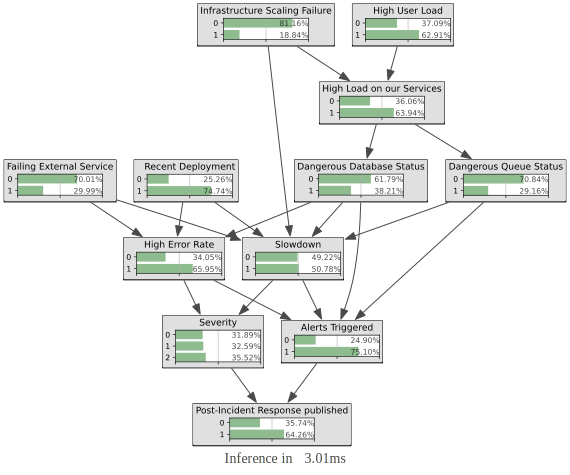

In [25]:
# We create the inference object 
ie=gum.LazyPropagation(bn)
# We use the inference object to calculate our scenarios:
gnb.showInference(bn,evs={})

Interestingly, the probability of no alerts being triggered is very close to the probability of no post-incident review being published. This makes sense – the team is unlikely to write a post-incident review if they weren't alerted that an incident is happening. 

However, this also highlights a gap in my current network. In reality, incidents can sometimes also be identified through channels other than automated alerts, such as support tickets raised by clients or team members noticing unusual product behavior in production.

## Scenario 1 :
A recent deployment has pushed new code in production, but we don't observe an increase in the global error rate in production, What's the severity of this incident ?

In [26]:
ie.setEvidence({'Recent Deployment':1, 'High Error Rate': 0})
ie.makeInference()
print("Severity probabilities:")
ie.posterior("Severity")

Severity probabilities:


(pyagrum.Tensor@0xea1c0b0) 
  Severity                   |
0        |1        |2        |
---------|---------|---------|
 0.1947  | 0.1716  | 0.6337  |

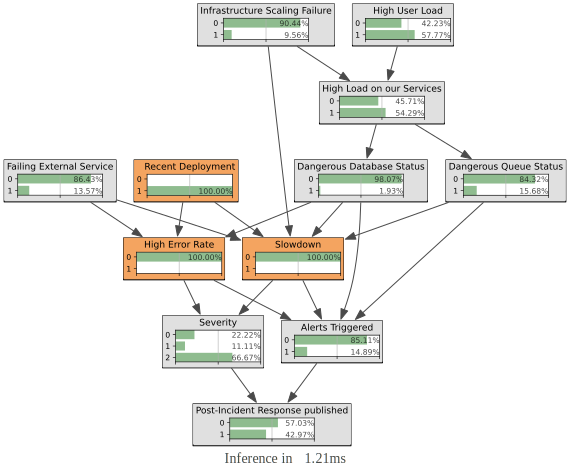

In [27]:
gnb.showInference(bn,evs={'Recent Deployment':1,'High Error Rate':0, 'Slowdown':0})

This one also makes sense, a recent code deployment that don't raise the error rate and the efficiency of the platform is very very unlikely to be the causes of an incident with high Severity like P0.

## Scenario 2 :
Alerts are firing and we observe slowdown in production, What's the causes ?

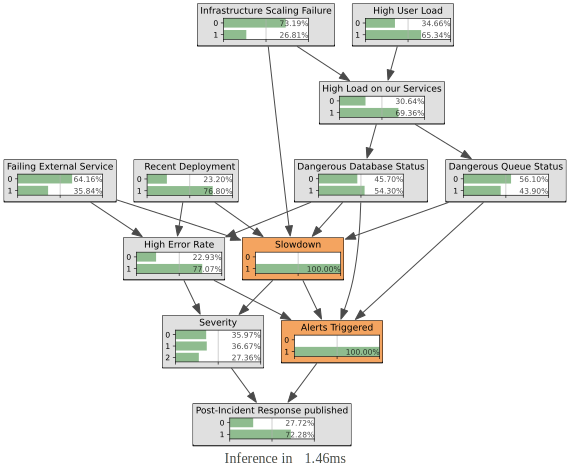

In [28]:
gnb.showInference(bn,evs={'Alerts Triggered':1,'Slowdown':1})

This one is an interesting scenario, it looks like that only by observing Slowdown and Alerts we cannot easily find one root causes of the problem, the most probable would be a recent bad deployment.

## Scenario 3: 
Alerts are Firing, but we know it wasn't a Deployment

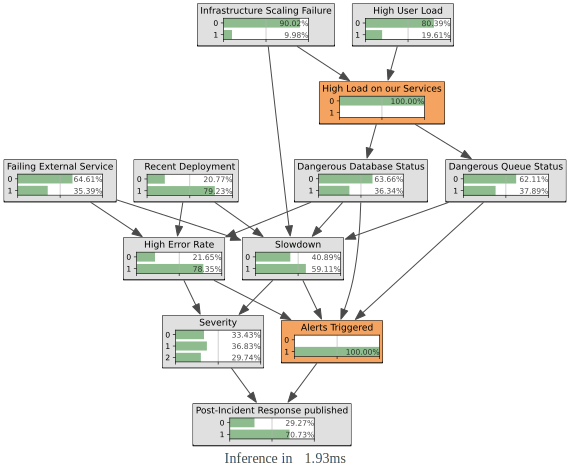

In [29]:
gnb.showInference(bn, evs={'Alerts Triggered': 1, 'High Load on our Services': 0})

## Scenario 4:
High User Load AND Infrastructure Scaling Failure

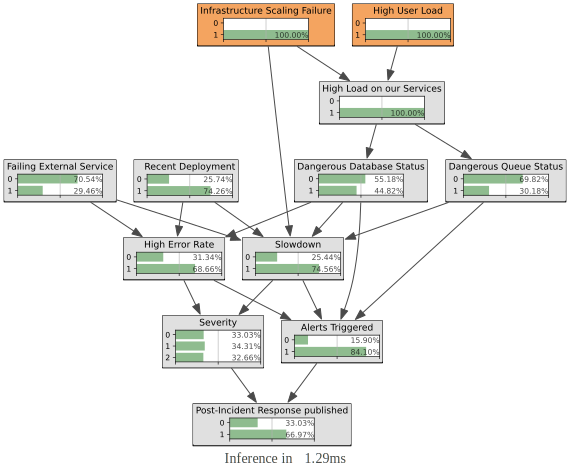

In [30]:
gnb.showInference(bn, evs={'High User Load': 1, 'Infrastructure Scaling Failure': 1})

## Scenario 5:
High User Load and Recent Deployment happened, but no High Load on Services yet observed

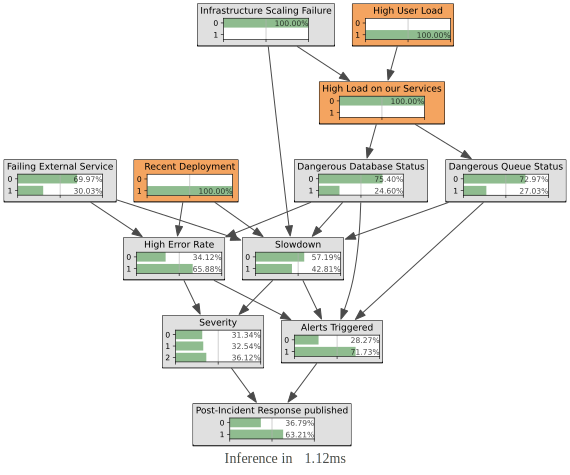

In [31]:
gnb.showInference(bn, evs={'High User Load': 1, 'Recent Deployment': 1, 'High Load on our Services': 0})

## Scenario 6:

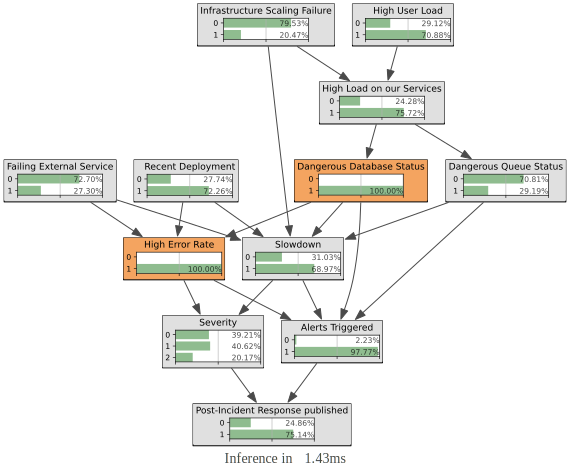

In [32]:
gnb.showInference(bn, evs={'Dangerous Database Status': 1, 'High Error Rate':1})